## Observations and Insights 

In [2]:
#Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/mouse_metadata.csv"
study_results_path = "data/study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(data_df["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = data_df.loc[data_df.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_id

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = data_df.loc[data_df["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data_df[data_df['Mouse ID'].isin(duplicate_id) == False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = clean_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
var = clean_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std = clean_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = clean_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary dataframe.
summary_table = pd.DataFrame({"Mean Tumor Volume": mean,
                               "Median Tumor Volume": median,
                               "Tumor Volume Variance": var,
                               "Tumor Volume STD": std,
                               "Tumor Volume SEM": sem})
summary_table.round(2)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_table = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_table.round(2)

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

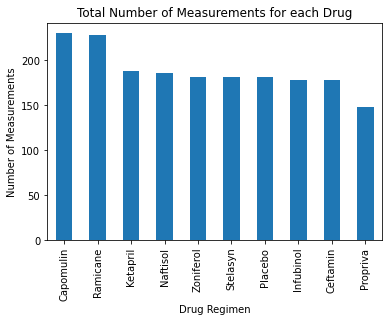

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
counts = clean_data['Drug Regimen'].value_counts()
counts.plot(kind = "bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.ylabel("Number of Measurements")
plt.title("Total Number of Measurements for each Drug")
plt.show()

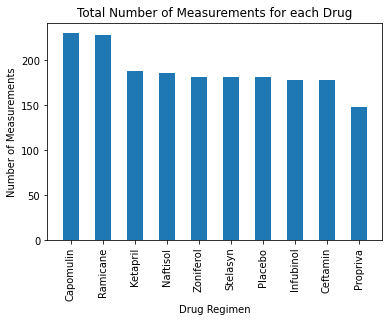

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
counts = clean_data['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values, width = .5)
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.ylabel("Number of Measurements")
plt.title("Total Number of Measurements for each Drug")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

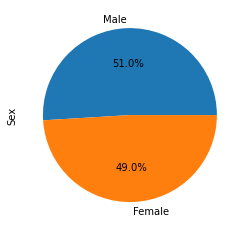

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts = clean_data.Sex.value_counts()
counts.plot(kind = "pie", autopct = '%1.1f%%')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

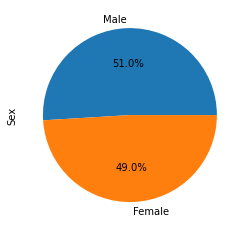

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = clean_data.Sex.value_counts()
plt.pie(counts.values, labels = counts.index.values, autopct = '%1.1f%%')
plt.ylabel("Sex")
plt.show

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_data.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_data = max_tumor.merge(clean_data, on = ['Mouse ID', 'Timepoint'], how = "left")

In [15]:
# Put treatments into a list for the for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merge_data.loc[merge_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


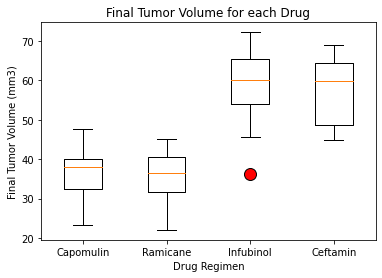

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
out = dict(markerfacecolor = 'red', markersize = 12)
plt.boxplot(tumor_vol_list, labels = treatment_list, flierprops = out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.title('Final Tumor Volume for each Drug')
plt.show()

## Line and Scatter Plots

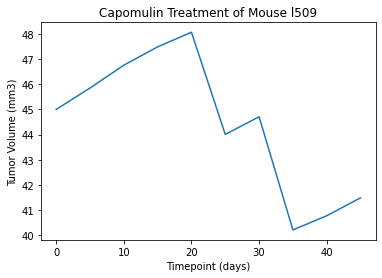

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_table = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse l509')
plt.show()

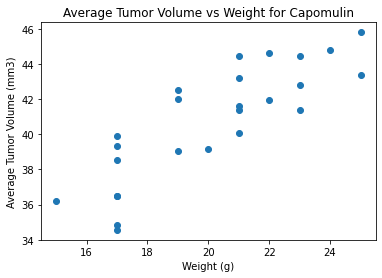

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_table = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs Weight for Capomulin')
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


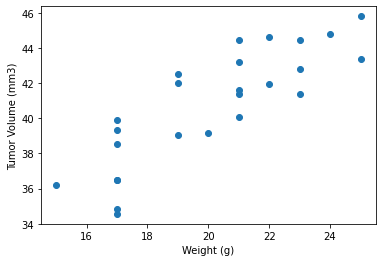

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

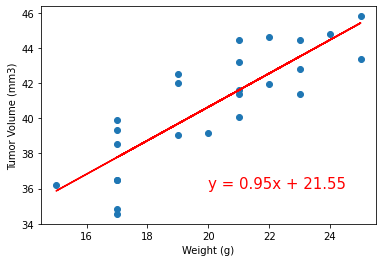

In [22]:
#Linear regression
x_values = capomulin_average['Weight (g)']
y_values = capomulin_average['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()